## Communicate Data Findings - Part I (Exploratory Analysis)

### Customer Personality Analysis

>**About Dataset** - Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

#### Attributes

- People

    ID: Customer's unique identifier
    
    Year_Birth: Customer's birth year
    
    Education: Customer's education level
    
    Marital_Status: Customer's marital status
    
    Income: Customer's yearly household income
    
    Kidhome: Number of children in customer's household
    
    Teenhome: Number of teenagers in customer's household
    
    Dt_Customer: Date of customer's enrollment with the company
    
    Recency: Number of days since customer's last purchase
    
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise
    

- Products

    MntWines: Amount spent on wine in last 2 years
    
    MntFruits: Amount spent on fruits in last 2 years
    
    MntMeatProducts: Amount spent on meat in last 2 years
    
    MntFishProducts: Amount spent on fish in last 2 years
    
    MntSweetProducts: Amount spent on sweets in last 2 years
    
    MntGoldProds: Amount spent on gold in last 2 years
    

- Promotion

    NumDealsPurchases: Number of purchases made with a discount
    
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    

- Place

    NumWebPurchases: Number of purchases made through the company’s website
    
    NumCatalogPurchases: Number of purchases made using a catalogue
    
    NumStorePurchases: Number of purchases made directly in stores
    
    NumWebVisitsMonth: Number of visits to company’s website in the last month


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Preliminary Wrangling

Before exploring our dataset, we will do some cleaning to our dataset to ensure a quality dataset for exploration.

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Some columns are not necessary for our exploratory analysis, we will be removing these columns.

In [6]:
df.drop(['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1, inplace=True)

In [7]:
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     04-09-2012       58       635         88              546   
1     08-03-2014       38        11          1                6   
2     21-08-2013       26       426         49              127   
3     10-02-2014       26        11          4               20   
4     19-01-2014       94       173         43              118   
...          ...      ...       ...        ...              ...   
2235  13-06-2013       46       709         43              182   
2236  10-06-2014       56       406          0               30   
2237  25-01-2014       91       908         48              217   
2238  24-01-2014        8       428         30              214   
2239  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  Complain  
0                     7         0  
1                     5         0  
2                     4         0  
3                     6         0  
4                     5         0  
...                 ...       ...  
2235                  5         0  
2236                  7         0  
2237                  6         0  
2238                  3         0  
2239                  7         0  

[2240 rows x 20 columns]

In [8]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
dtype: object

#### Further Cleaning

- convert the date of customer enrollment with the company to date type and extract the year into a new column

- convert education  qualification  to ordered categorical types

In [9]:
# convert to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True)
# extract year from date
df['enrol_year'] = df['Dt_Customer'].dt.year

C:\Users\Akinkunmi\AppData\Local\Temp\ipykernel_4468\217565877.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True)
C:\Users\Akinkunmi\AppData\Local\Temp\ipykernel_4468\217565877.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True)
C:\Users\Akinkunmi\AppData\Local\Temp\ipykernel_4468\217565877.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True)
C:\Users\Akinkunmi\AppData\Local\Temp\ipykernel_4468\217565877.py:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or

C:\Users\Akinkunmi\AppData\Local\Temp\ipykernel_4468\217565877.py:2: UserWarning: Parsing '21-09-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True)
C:\Users\Akinkunmi\AppData\Local\Temp\ipykernel_4468\217565877.py:2: UserWarning: Parsing '18-12-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True)
C:\Users\Akinkunmi\AppData\Local\Temp\ipykernel_4468\217565877.py:2: UserWarning: Parsing '19-11-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True)
C:\Users\Akinkunmi\AppData\Local\Temp\ipykernel_4468\217565877.py:2: UserWarning: Parsing '13-06-2014' in DD/MM/YYYY format. Provide format or

In [10]:
df[['Dt_Customer', 'enrol_year']].dtypes

Dt_Customer    datetime64[ns]
enrol_year              int64
dtype: object

#### Convert 'education' to ordered categorical types

In [11]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [12]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [13]:
# Educational levels
education_types = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

# Returns the types for education_types with the categories and orderedness
education_types = pd.api.types.CategoricalDtype(ordered=True, categories=education_types)

# Use pandas.astype() to convert the "Education" column from a plain object type into an ordered categorical type 
df['Education'] = df['Education'].astype(education_types);

#### Check for duplicates in the dataset

In [14]:
sum(df.duplicated())

201

In [15]:
# remove duplicated rows
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(2039, 21)

In [17]:
# descriptives of the numerical column
df.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2039.000000    2015.000000  2039.000000  2039.000000  2039.000000   
mean   1968.768024   52362.016377     0.444826     0.507602    49.096616   
std      11.983086   25580.674925     0.537843     0.546930    28.974507   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35533.500000     0.000000     0.000000    24.000000   
50%    1970.000000   51537.000000     0.000000     0.000000    49.000000   
75%    1977.000000   68641.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2039.000000  2039.000000      2039.000000      2039.000000   
mean    303.332026    26.351153       167.755272        37.456596   
std     335.823263    39.824028       227.930430        54.704882   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.000000     2.000000        16.000000         3.000000   
50%     174.000000     8.000000        67.000000        12.000000   
75%     503.500000    33.000000       230.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2039.000000   2039.000000        2039.000000      2039.000000   
mean          27.215792     43.760177           2.329083         4.098578   
std           41.701678     52.024687           1.934170         2.799936   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           34.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth     Complain  \
count          2039.000000        2039.000000        2039.000000  2039.000000   
mean              2.658656           5.772437           5.310446     0.009809   
std               2.936390           3.236841           2.438496     0.098576   
min               0.000000           0.000000           0.000000     0.000000   
25%               0.000000           3.000000           3.000000     0.000000   
50%               2.000000           5.000000           6.000000     0.000000   
75%               4.000000           8.000000           7.000000     0.000000   
max              28.000000          13.000000          20.000000     1.000000   

        enrol_year  
count  2039.000000  
mean   2013.033840  
std       0.684421  
min    2012.000000  
25%    2013.000000  
50%    2013.000000  
75%    2014.000000  
max    2014.000000

As seen from the descriptive table, the income column contain missing values. We will drop the rows in which the income is not recorded.

In [18]:
# drop rows with missing values
df.dropna(axis=0, inplace=True)

In [19]:
df.describe()

Year_Birth         Income      Kidhome    Teenhome      Recency  \
count  2015.000000    2015.000000  2015.000000  2015.00000  2015.000000   
mean   1968.783623   52362.016377     0.442184     0.50670    48.990074   
std      11.984757   25580.674925     0.536185     0.54657    28.959083   
min    1893.000000    1730.000000     0.000000     0.00000     0.000000   
25%    1959.000000   35533.500000     0.000000     0.00000    24.000000   
50%    1970.000000   51537.000000     0.000000     0.00000    49.000000   
75%    1977.000000   68641.000000     1.000000     1.00000    74.000000   
max    1996.000000  666666.000000     2.000000     2.00000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2015.000000  2015.000000      2015.000000      2015.000000   
mean    304.596030    26.410918       167.815385        37.579156   
std     336.621329    39.847050       226.396568        54.841113   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.000000     2.000000        16.000000         3.000000   
50%     176.000000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       230.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2015.000000   2015.000000        2015.000000      2015.000000   
mean          27.180149     43.694789           2.327543         4.099256   
std           41.479848     51.634281           1.924831         2.758948   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           34.000000     56.000000           3.000000         6.000000   
max          262.000000    321.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth     Complain  \
count          2015.000000        2015.000000        2015.000000  2015.000000   
mean              2.668486           5.784119           5.313151     0.009926   
std               2.940535           3.236544           2.437236     0.099156   
min               0.000000           0.000000           0.000000     0.000000   
25%               0.000000           3.000000           3.000000     0.000000   
50%               2.000000           5.000000           6.000000     0.000000   
75%               4.000000           8.000000           7.000000     0.000000   
max              28.000000          13.000000          20.000000     1.000000   

        enrol_year  
count  2015.000000  
mean   2013.034243  
std       0.685586  
min    2012.000000  
25%    2013.000000  
50%    2013.000000  
75%    2014.000000  
max    2014.000000

### What is/are the main feature(s) of interest in the dataset?

The dataset is about the customers personality. We are interested in finding out how customers' personality can be used to predict their to marketing campaign. For this analysis, we will look at relationship between several variables such as;

- relationship between income and education backgound and marital status

- patterns of spending by customers

- which mode of visit does customers prefer for campaigns

## Univariate Exploration

We will start by looking at the distribution of customers' income

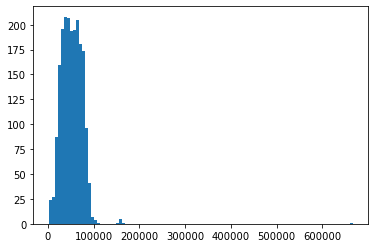

In [20]:
plt.hist(data= df, x='Income', bins= 100)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

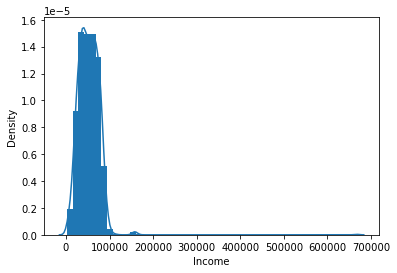

In [21]:
sns.distplot(df['Income'], bins = 50, hist_kws = {'alpha' : 1})

Let us scale our histogram distribution of income using log

In [22]:
# Transform the describe() to a scale of log10
np.log10(df['Income'].describe())

count    3.304275
mean     4.719016
std      4.407912
min      3.238046
25%      4.550638
50%      4.712119
75%      4.836584
max      5.823908
Name: Income, dtype: float64

Text(0.5, 0, 'Log of Income')

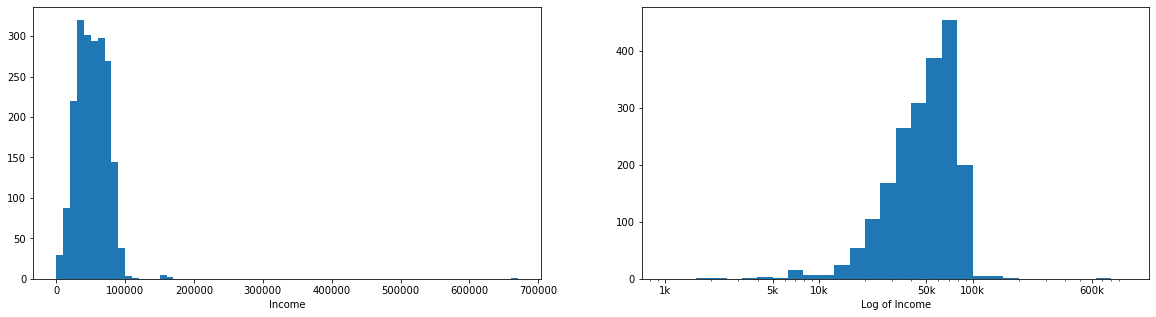

In [23]:
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, without scaling
plt.subplot(1, 2, 1)

bins = np.arange(0, df['Income'].max()+10000, 10000)
plt.hist(data= df, x='Income', bins= bins);
plt.xlabel('Income')

# histogram on right, with log scaling
plt.subplot(1, 2, 2)

bins = 10 ** np.arange(3, 6+0.1, 0.1)
plt.hist(data= df, x='Income', bins= bins);
plt.xscale('log')
plt.xticks([1e3, 5e3, 1e4, 5e4, 1e5, 6e5], ['1k', '5k', '10k', '50k', '100k', '600k'])
plt.xlabel('Log of Income')

From the above log scaled histogram, it is observed that customers' income is distributed mostly between 10k and 100k. The distribution is skewed to the left below 50k.

#### We will explore the frequencies of categorical variables and some discrete numerical variable

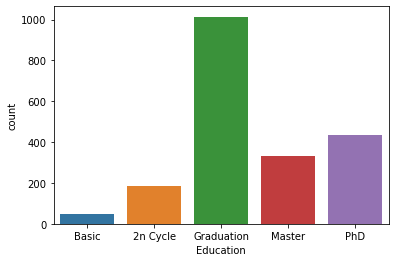

In [24]:
# use countplot function in seaborn to explore frequency
sns.countplot(data=df, x='Education');

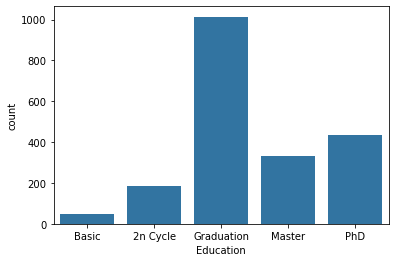

In [25]:
# plot frequncy bar with the same colour for all categories
bcolor = sns.color_palette()[0]
sns.countplot(data= df, x='Education', color=bcolor);

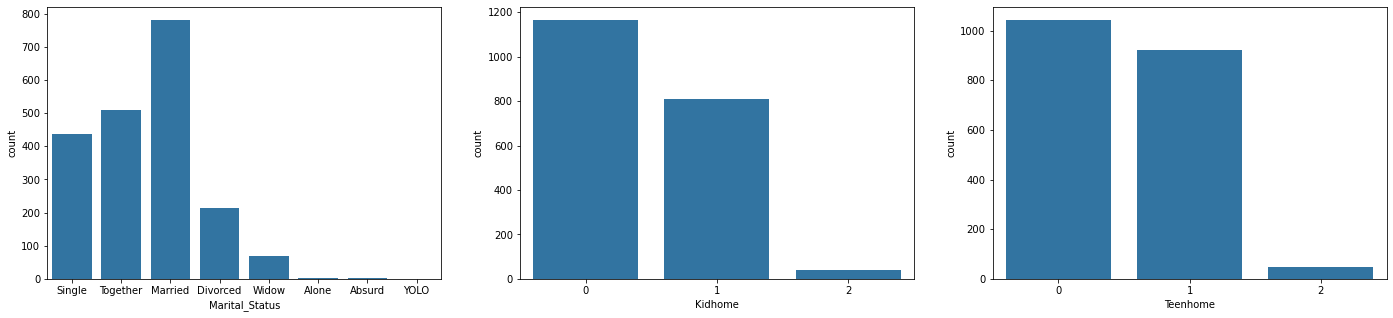

In [26]:
# use subplot to plot frequency count for other categorical and discrete numerical variable
# set figure for the plots
plt.figure(figsize = [24, 5])

# frequency bar chart of customers' marital status
plt.subplot(1, 3, 1)
sns.countplot(data= df, x='Marital_Status', color=bcolor)

# frequency bar chart of customers' number of children
plt.subplot(1, 3, 2)
sns.countplot(data= df, x='Kidhome', color=bcolor)

# frequency bar chart of number of teenager in the customers' household
plt.subplot(1, 3, 3)
sns.countplot(data= df, x='Teenhome', color=bcolor);

In [27]:
df['enrol_year'].unique()

array([2012, 2014, 2013], dtype=int64)

Let's explore the number of customers that was enrolled per year

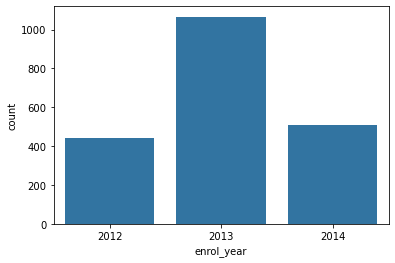

In [28]:
sns.countplot(data= df, x='enrol_year', color=bcolor);

Most customers were enrolled in 2013

## Bivariate Exploration

To start off, we will look at a pairplot of some of the numerical variables 

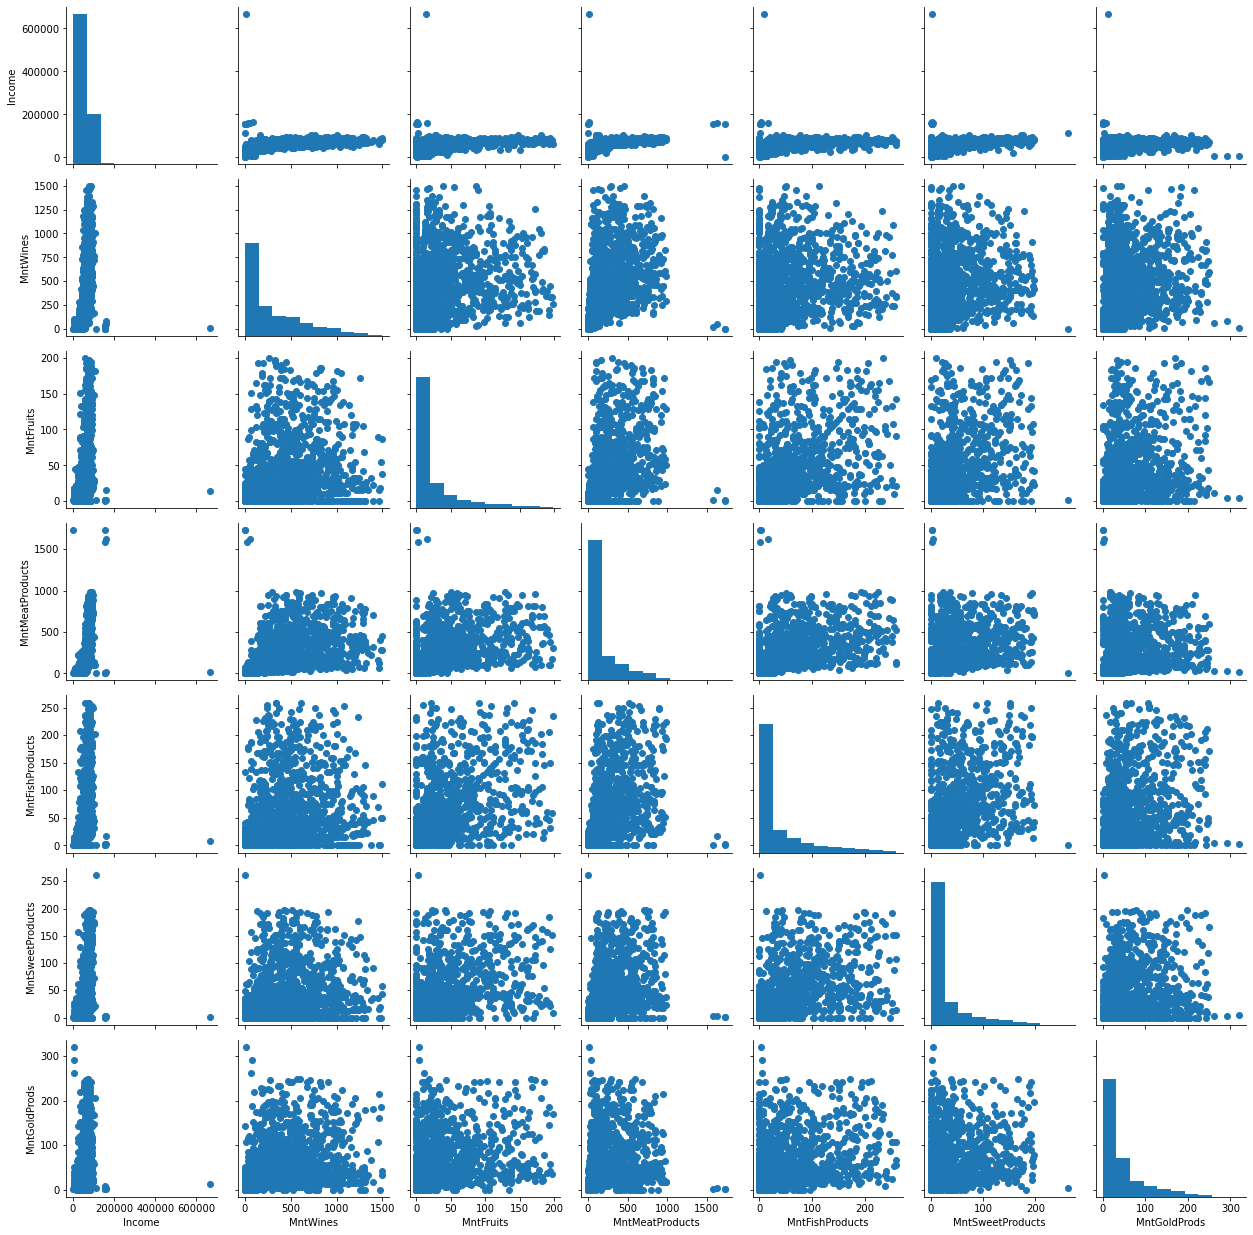

In [29]:
# pairplot between interesting numerical variables
g = sns.PairGrid(data = df, vars = ['Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

It is observed that there exist linear relationship between most of the numerical variables we plotted. We will explore this relationship further.

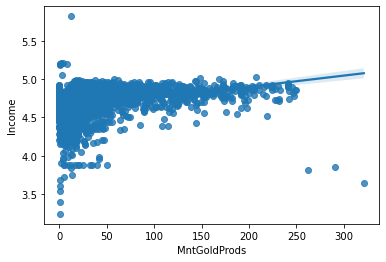

In [30]:
# define a function to transform the income variable
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

# relationship between income and amount spent on gold using seaborn's regplot() function
sns.regplot(data=df, x='MntGoldProds', y= df['Income'].apply(log_trans));

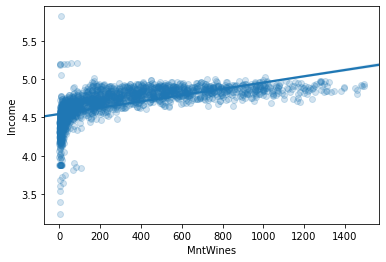

In [31]:
# relationship between customers' income and amount spent on wines.. jitter and transparency applied
sns.regplot(data = df, x = 'MntWines', y = df['Income'].apply(log_trans),
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/5});

Regplot() is used to explore the relationship instead of scatterplot() so as to fit a regression line for the relationship

It is observed that most of the data point of customers' income are between the range of 1,000 to 100,000. For the purpose of exploration, we will filter out rows of data where the income is greater than 100,000.

In [32]:
df_new = df.loc[df['Income'] <= 100000]
df_new

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2232        1986  Graduation         Single  26816.0        0         0   
2235        1967  Graduation        Married  61223.0        0         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  MntFishProducts  \
0     2012-04-09       58       635         88  ...              172   
1     2014-08-03       38        11          1  ...                2   
2     2013-08-21       26       426         49  ...              111   
3     2014-10-02       26        11          4  ...               10   
4     2014-01-19       94       173         43  ...               46   
...          ...      ...       ...        ...  ...              ...   
2232  2012-08-17       50         5          1  ...                3   
2235  2013-06-13       46       709         43  ...               42   
2237  2014-01-25       91       908         48  ...               32   
2238  2014-01-24        8       428         30  ...               80   
2239  2012-10-15       40        84          3  ...                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2232                 4             3                  1                0   
2235               118           247                  2                9   
2237                12            24                  1                2   
2238                30            61                  2                6   
2239                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                      10                  4                  7         0   
1                       1                  2                  5         0   
2                       2                 10                  4         0   
3                       0                  4                  6         0   
4                       3                  6                  5         0   
...                   ...                ...                ...       ...   
2232                    0                  3                  4         0   
2235                    3                  4                  5         0   
2237                    3                 13                  6         0   
2238                    5                 10                  3         0   
2239                    1                  4                  7         0   

      enrol_year  
0           2012  
1           2014  
2           2013  
3           2014  
4           2014  
...          ...  
2232        2012  
2235        2013  
2237        2014  
2238        2014  
2239        2012  

[2002 rows x 21 columns]

Lets compare the relationship between income and other numerical variables again

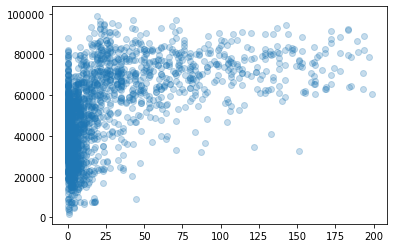

In [33]:
plt.scatter(data=df_new, x='MntFruits', y='Income', alpha=1/4);

Let's look at pairwise correlations that exist between the amount spent on products and also the customers' income

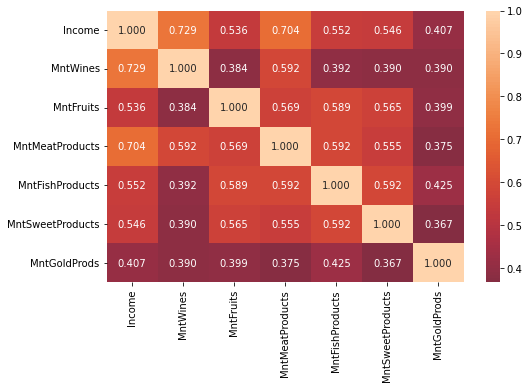

In [34]:
var = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df_new[var].corr(), annot = True, fmt = '.3f', center = 0)
plt.show()

There is a positive relationship between income and amount spent on different products by the customers. Amount spent on wine has the highest corelation with income.

#### Violin and Boxplot plot for plotting a Quantitative variable versus Qualitative variable

We will start off with relationship between customers' income and educational status.

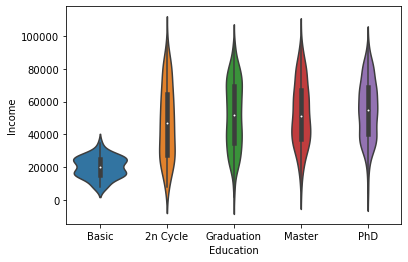

In [35]:
# A violin plot with default arguments in violinplot() function
sns.violinplot(data=df_new, x='Education', y='Income');

We can set the "color" parameter to make each curve the same color. Inside each curve, there is a black shape with a white dot inside. We will replace this with quartile by specifying inner parameter in violin plot to quartile.

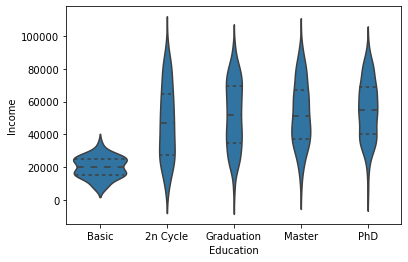

In [36]:
sns.violinplot(data=df_new, x='Education', y='Income', color=bcolor, inner='quartile');

We will compare the violin chart side by side with boxplot of the same relationship.

(-14687.679277402936, 118204.2589092388)

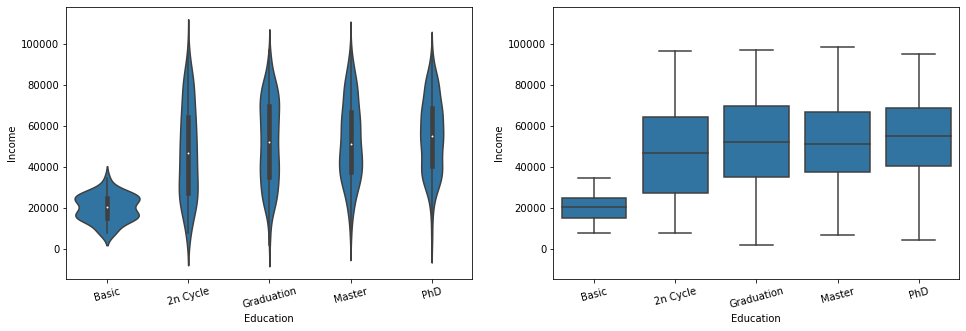

In [37]:
# plot two figures in one plot
plt.figure(figsize = [16, 5])
bcolor = sns.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.violinplot(data=df_new, x='Education', y='Income', color=bcolor)
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_new, x='Education', y='Income', color=bcolor)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

From the two plots, it is observed that the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. It can be seen that Basic education has the lowest median income, while PhD has the highest median.

#### Clustered bar chart to compare two qualitative variables

We will use a clustered bar chart to depict relationship between two qualitative variables. In this case we will consider the relationship between education and marital status.

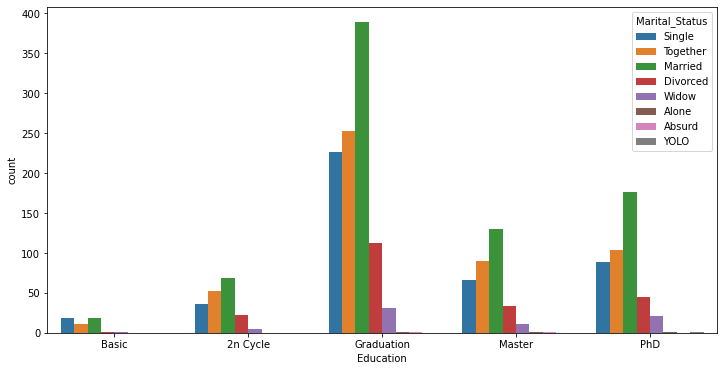

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Education', hue='Marital_Status');

#### Facetting

We could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots.

We will explore facetting on our dataset by looking at the distribution of customers income across customers' education background.

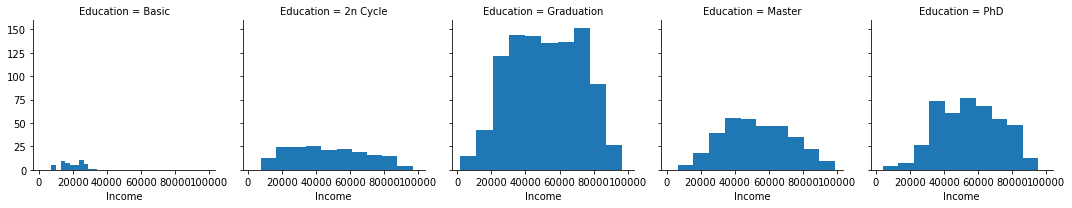

In [39]:
# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = df_new, col = 'Education')
g.map(plt.hist, "Income");

#### Line plot

We will use line plot to visualize the trend in the amount customers spent on products over the three years.

In [40]:
# group the amount spent on each product according to year
avg_amnt = df_new.groupby('enrol_year')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
avg_amnt

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
enrol_year                                                            
2012        393.878995  30.794521       194.267123        45.399543   
2013        299.684310  26.266541       167.100189        36.634216   
2014        239.715415  22.760870       139.330040        32.982213   

            MntSweetProducts  MntGoldProds  
enrol_year                                  
2012               32.847032     54.054795  
2013               27.098299     45.448960  
2014               21.735178     30.968379

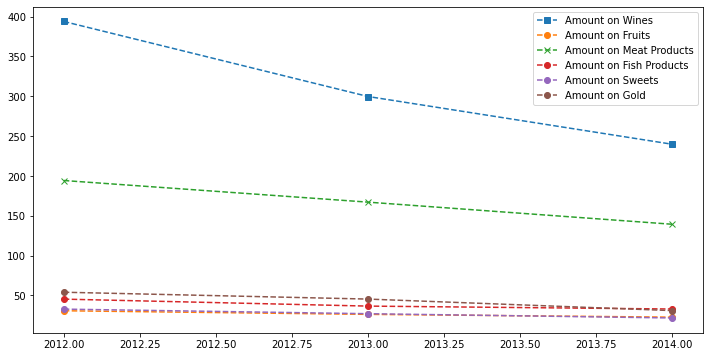

In [41]:
# set figure for the line chart
plt.figure(figsize=(12,6))

# plot the line charts 
plt.plot(avg_amnt.index, avg_amnt['MntWines'], linestyle='--', marker='s', label = "Amount on Wines")
plt.plot(avg_amnt.index, avg_amnt['MntFruits'], linestyle='--', marker='o', label = "Amount on Fruits")
plt.plot(avg_amnt.index, avg_amnt['MntMeatProducts'], linestyle='--', marker='x', label = "Amount on Meat Products")
plt.plot(avg_amnt.index, avg_amnt['MntFishProducts'], linestyle='--', marker='o', label = "Amount on Fish Products")
plt.plot(avg_amnt.index, avg_amnt['MntSweetProducts'], linestyle='--', marker='o', label = "Amount on Sweets")
plt.plot(avg_amnt.index, avg_amnt['MntGoldProds'], linestyle='--', marker='o', label = "Amount on Gold")
plt.legend()
plt.show()

We could see from the above plot that there is decrease in the amount spent on each products from year to year.

## Multivariate Exploration

In this section, we will explore how we can combine three or more variables together to depict relationship in our dataset.

We will look at relationship between customers' income and Recency(no of days since customers' last purchase) across different educational level and marraige type.

First, we will reduce the marital status into just three groups; single, married and others.

- single, widow, divorced and alone will be grouped together as 'single',
- together and married will be grouped together as married,
- absurd and YOLO will be grouped as others.

In [42]:
df_new.loc[df_new["Marital_Status"].isin(['Alone', 'Widow', 'Divorced']), "Marital_Status"] = 'Single'

In [43]:
df_new.loc[df_new["Marital_Status"].isin(['Absurd', 'YOLO']), "Marital_Status"] = 'Other'
df_new.loc[df_new["Marital_Status"] == 'Together', "Marital_Status"] = 'Married'

In [44]:
# confirm the changes
df_new['Marital_Status'].unique()

array(['Single', 'Married', 'Other'], dtype=object)

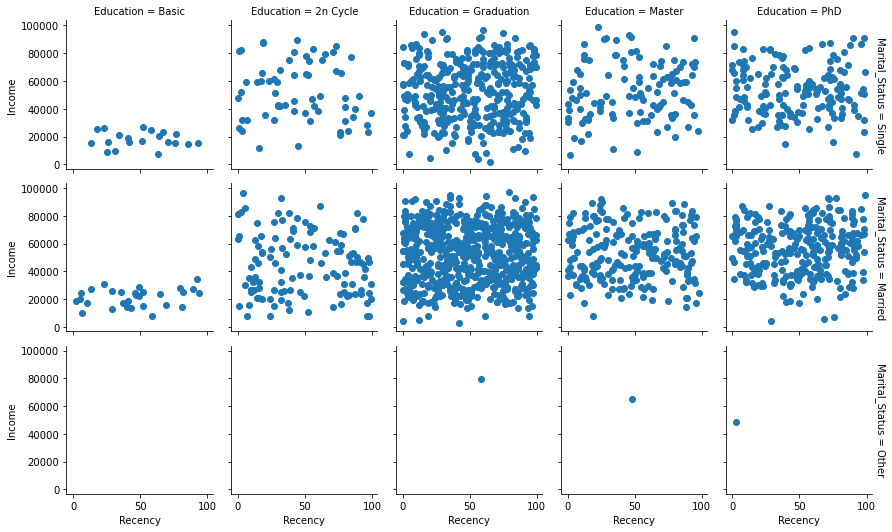

In [45]:
# plot a facet scatterplot
g = sns.FacetGrid(data = df_new, col = 'Education', row = 'Marital_Status', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'Recency', 'Income');

We can see from the above plot that there are only three data points for other group of marital status aside single and married. We will filter the rows of data where marital status is other before exploring further.

In [46]:
# filter the dataframe to include only single and married customers
df_final = df_new.loc[df_new['Marital_Status'].isin(['Single','Married'])]
# confirm the changes
df_final['Marital_Status'].unique()

array(['Single', 'Married'], dtype=object)

We are going to use heatmap to visualize the average income of customers of different educational level and marital status

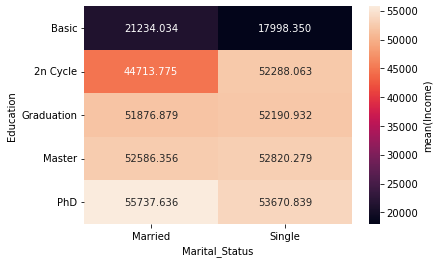

In [47]:
# group by education and marital status and find mean across dataframe. We then isolate the mean income column
cat_means = df_final.groupby(['Education', 'Marital_Status']).mean()['Income']
cat_means = cat_means.reset_index(name = 'avg_income')
cat_means = cat_means.pivot(index = 'Education', columns = 'Marital_Status',
                            values = 'avg_income')
# plot the heatmap
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Income)'});

We can observe from the plot above that the single customers with basic education has the lowest average income while Married customers with PhD receives the highest average income

## Discussion of Findings

So far so good, we have explored our dataset by looking at univariate, bivariate and multivariate exploration. We discovered some interesting features from the dataset. Some of them are;

- Customers' income is positively related to their educational status'
- The income of a customer will determine how much he would spend on different products.
- Most customers receives income between 10,000 and 100,000.
- There is decrease in the amount spent by customers on products from 2012 to 2014.